# Food Swamps in the U.S.

+ Author: *Michael A. Thomas*
+ Date: 19 September 2021
+ Data Source: <https://data.world/datafiniti/fast-food-restaurants-across-america> (Fast Food Restaurants)

# About the Data

<p> The csv data provided by Data World and Datafiniti compile attributes on 10,000 food restaurants nationwide. The csv data
    used was processed using pandas/geopandas in Jupyter Notebook and superfluous series were removed 
    (e.g. - address, country). The dataframe was converted to a geodataframe, allowing geopandas to acknowledge a geometry
    geodataframe series. The fast food data is plotted alongside the U.S. and urban geojsons imported remotely 
    (see comments below).
</p>

# Table of Contents

[About the Data](#about-the-data)
    - [Importing Libraries and Data](#importing-libraries-and-data)
    - [Table of Contents](#table-of-contents)
    - [Dataframe to GeoDataframe](#dataframe-to-geodataframe)
    - [Small Scale Data](#small-scale-data)
    
Rich, is there an easier way to display TOC in jupyter? the above code displays correctly and works in my VSC 

# Importing Libraries and Overlays

In [1]:
# Importing libraries
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [2]:
# importing overlays
# importing states
states_r = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')
# importing urban data
urban_r = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_ua10_500k.zip')

# Writing Data to File

In [20]:
# writing spatial overlays to file
# states
states_r.to_file('.\data\states.geojson', driver='GeoJSON')

In [8]:
# urban data
urban_r.to_file(r'.\data\urban.shp')

# Importing Data and CRS Transformation

In [3]:
 # importing all data
restaurants = pd.read_csv('.\data\good_food.csv')
states = gpd.read_file('.\data\states.geojson')
urban = gpd.read_file(r".\data\urban.shp") # for some reason it imports just fine as a shp, but not geojson
# I tried converting to raw string to negate windows reading it as escapecode, doubled the backslashes, and tried 
# the forward slashes with no luck. This is the only way i've gotten it to work. I also tried a newer data set remotely
# and rewrote urban to file with no luck either. 

# NOTE: There is still a urban.geojson file in .map\data 

In [12]:
# verify CRS of overlay data
print(states.crs, urban.crs)

epsg:4269 epsg:4269


In [15]:
# convert overlay CRS to WGS 84
states.to_crs(epsg=4326)
urban.to_crs(epsg=4326);

In [16]:
# verify CRS of data
print(states.crs, urban.crs)

epsg:4269 epsg:4269


# Dataframe to GeoDataframe

In [4]:
# create a GeoDataFrame from the CSV data and use the NAD 83 epsg:4269 CRS
geoms = [Point(xy) for xy in zip(restaurants.longitude, restaurants.latitude)]
crs = {'init' :'epsg:4269'}
f00d = gpd.GeoDataFrame(restaurants, crs=crs, geometry=geoms)

C:\Users\matho\anaconda3\envs\module-06\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# Cursory Look at Data

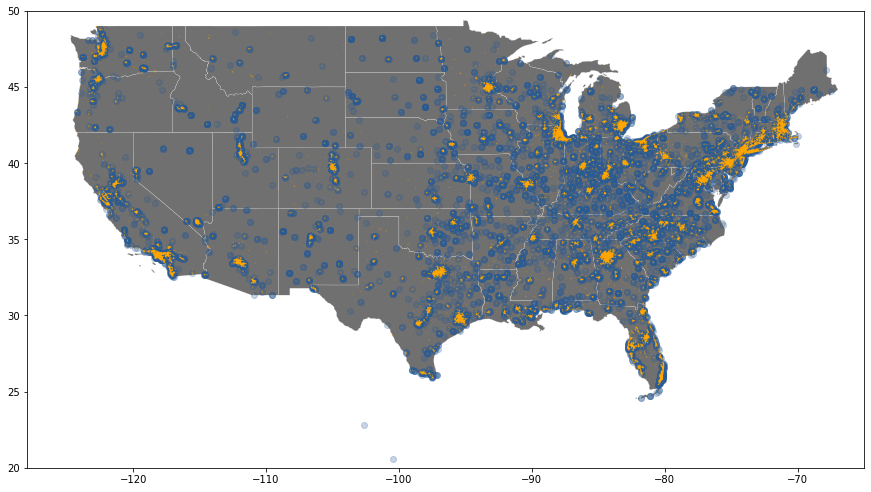

In [18]:
# plot all the data to have a look
fig, ax = plt.subplots()

states.plot(ax=ax, edgecolor='#f2f2f2', linewidth=.2, color='#707070', zorder=0);
urban.plot(ax=ax, color='orange', zorder=2, markersize=.4);
f00d.plot(ax=ax, color='#295b97', zorder=1, alpha=0.25);

ax.set(xlim=(-128,-65), ylim=(20,50));

# Exporting Fast Food Data

In [6]:
f00d.to_file('.\\data\\food.geojson', driver='GeoJSON')